# Import libraries

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset

In [195]:
salarydata_train = pd.read_csv('SalaryData_Train.csv')
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [196]:
salarydata_test = pd.read_csv('SalaryData_Test.csv')
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Exploratory data analysis

In [197]:
salarydata_train.shape

(30161, 14)

In [198]:
salarydata_test.shape

(15060, 14)

In [199]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [200]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [201]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [202]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Declare feature vector and target variable

In [203]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

# Split data into separate training and test set

In [204]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [205]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [206]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

# Converting all the categorical data into numeric

In [207]:
cat_columns = X_train.select_dtypes(['object']).columns

#convert all categorical columns to numeric
X_train[cat_columns] = X_train[cat_columns].apply(lambda x: pd.factorize(x)[0])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [208]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
8166,54,0,0,10,0,0,0,0,0,0,0,52,0
7138,21,1,0,10,1,1,1,0,0,0,0,30,0
437,30,1,1,9,1,2,2,0,0,0,0,60,0
5436,42,1,1,9,0,3,0,0,0,0,0,40,0
6541,37,2,1,9,0,4,0,0,0,0,0,30,0


In [209]:
X_train.shape

(21112, 13)

In [210]:
cat_columns = X_test.select_dtypes(['object']).columns

#convert all categorical columns to numeric
X_test[cat_columns] = X_test[cat_columns].apply(lambda x: pd.factorize(x)[0])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [213]:
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
25338,21,0,0,9,0,0,0,0,0,0,0,60,0
18840,21,0,1,7,1,1,1,0,1,0,0,40,0
8391,56,0,2,13,2,0,2,0,1,0,0,45,0
18258,43,1,3,10,2,2,3,0,0,0,0,20,0
16669,53,2,2,13,1,3,4,1,0,0,0,50,1


In [214]:
X_test.shape

(9049, 13)

# Feature Engineering

In [215]:
X_train.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

In [216]:
X_test.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
dtype: object

In [217]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
8166,54,0,0,10,0,0,0,0,0,0,0,52,0
7138,21,1,0,10,1,1,1,0,0,0,0,30,0
437,30,1,1,9,1,2,2,0,0,0,0,60,0
5436,42,1,1,9,0,3,0,0,0,0,0,40,0
6541,37,2,1,9,0,4,0,0,0,0,0,30,0


In [218]:
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
25338,21,0,0,9,0,0,0,0,0,0,0,60,0
18840,21,0,1,7,1,1,1,0,1,0,0,40,0
8391,56,0,2,13,2,0,2,0,1,0,0,45,0
18258,43,1,3,10,2,2,3,0,0,0,0,20,0
16669,53,2,2,13,1,3,4,1,0,0,0,50,1


# Feature Scaling

In [219]:
cols = X_train.columns

In [220]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [221]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [222]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [223]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,1.178270,-1.292170,-0.821739,-0.047795,-0.798246,-1.804341,-0.955398,-0.342454,-0.69281,-0.148233,-0.220391,0.929330,-0.241067
1,-1.333605,-0.327111,-0.821739,-0.047795,0.113640,-1.488974,-0.230393,-0.342454,-0.69281,-0.148233,-0.220391,-0.919031,-0.241067
2,-0.648548,-0.327111,-0.549284,-0.438899,0.113640,-1.173606,0.494612,-0.342454,-0.69281,-0.148233,-0.220391,1.601461,-0.241067
3,0.264861,-0.327111,-0.549284,-0.438899,-0.798246,-0.858238,-0.955398,-0.342454,-0.69281,-0.148233,-0.220391,-0.078867,-0.241067
4,-0.115726,0.637948,-0.549284,-0.438899,-0.798246,-0.542871,-0.955398,-0.342454,-0.69281,-0.148233,-0.220391,-0.919031,-0.241067


# Model training

In [224]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the results

In [225]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check accuracy score

In [230]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7958


In [227]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

# Compare the train-set and test-set accuracy

In [231]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [232]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8046


# Confusion matrix

In [234]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6556  242]
 [1606  645]]

True Positives(TP) =  6556

True Negatives(TN) =  645

False Positives(FP) =  242

False Negatives(FN) =  1606


<AxesSubplot:>

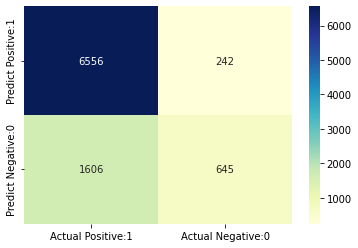

In [235]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

In [236]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.88      6798
        >50K       0.73      0.29      0.41      2251

    accuracy                           0.80      9049
   macro avg       0.77      0.63      0.64      9049
weighted avg       0.78      0.80      0.76      9049

